**EDA , Feature Engineering & Visualisation**

--- Data Loading and Initial Inspection ---

First 5 rows of the dataset:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 column

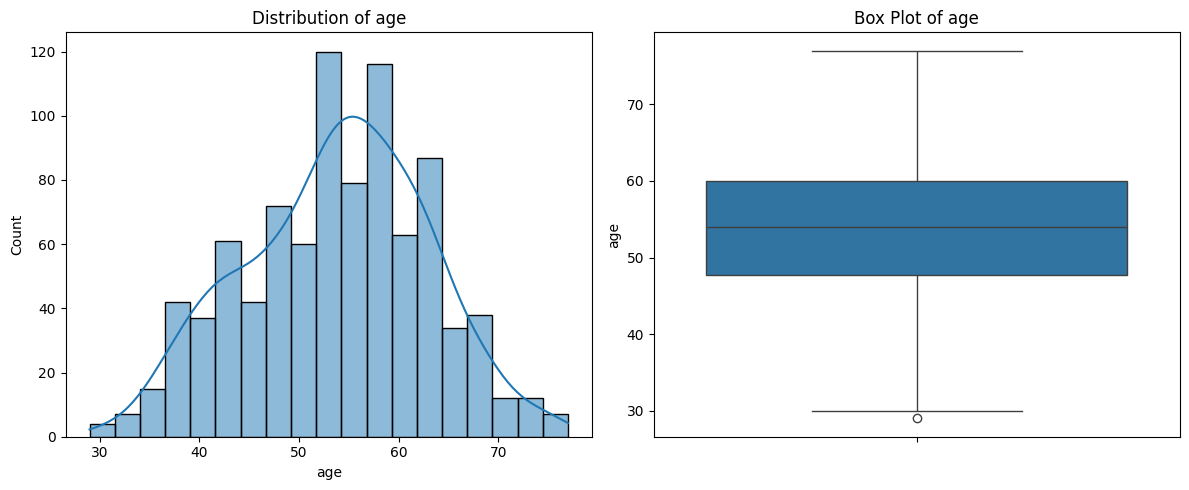

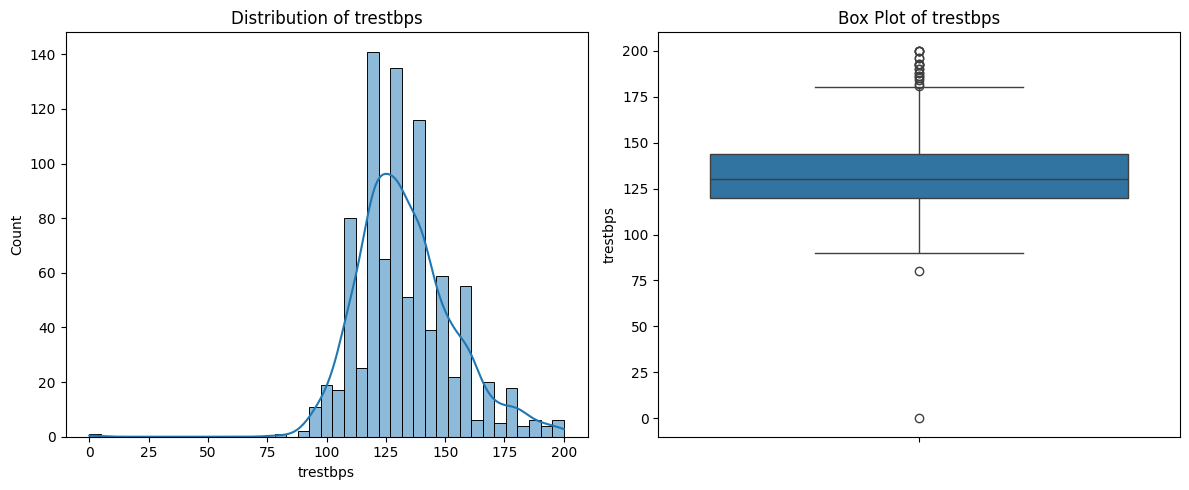

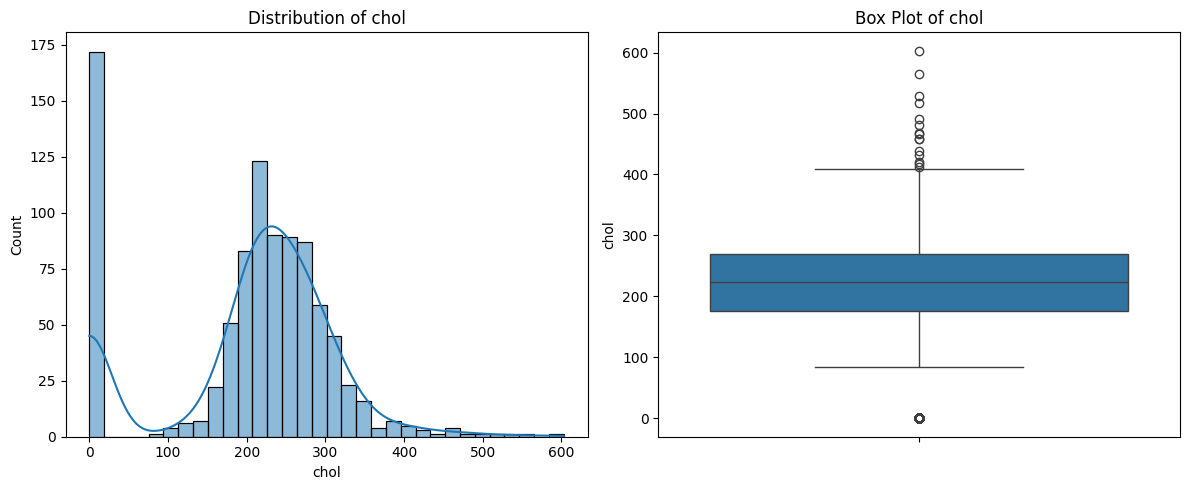

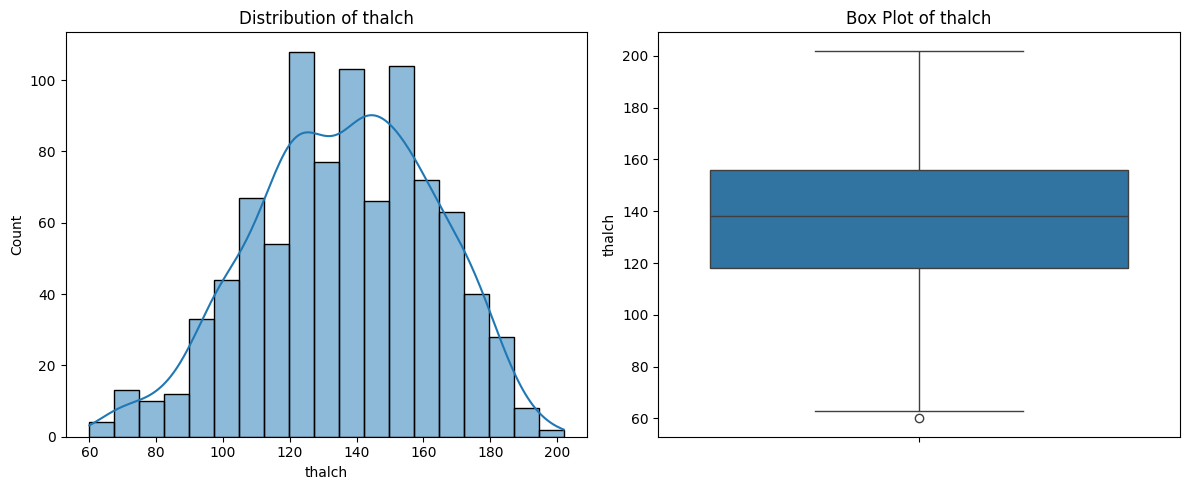

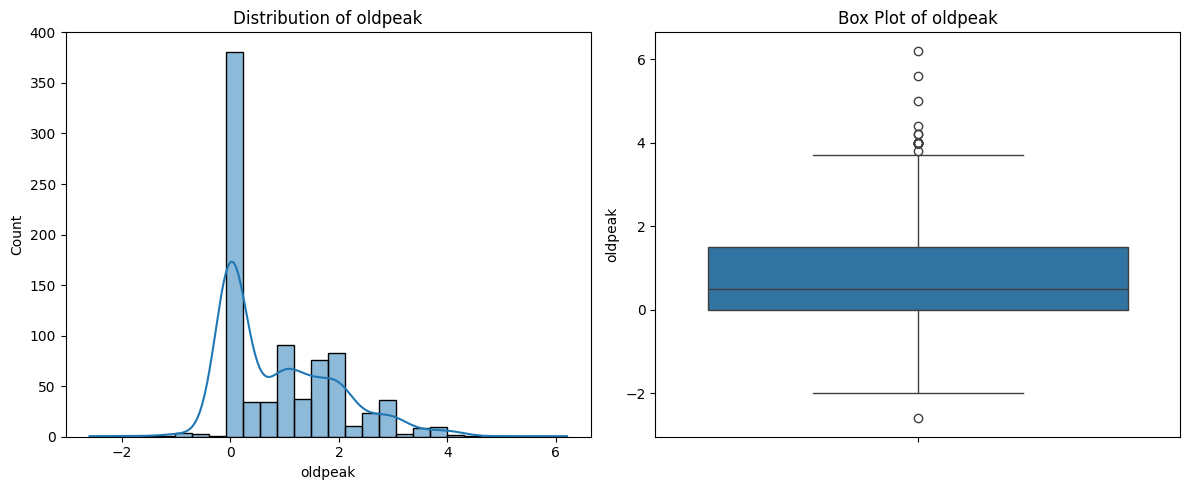

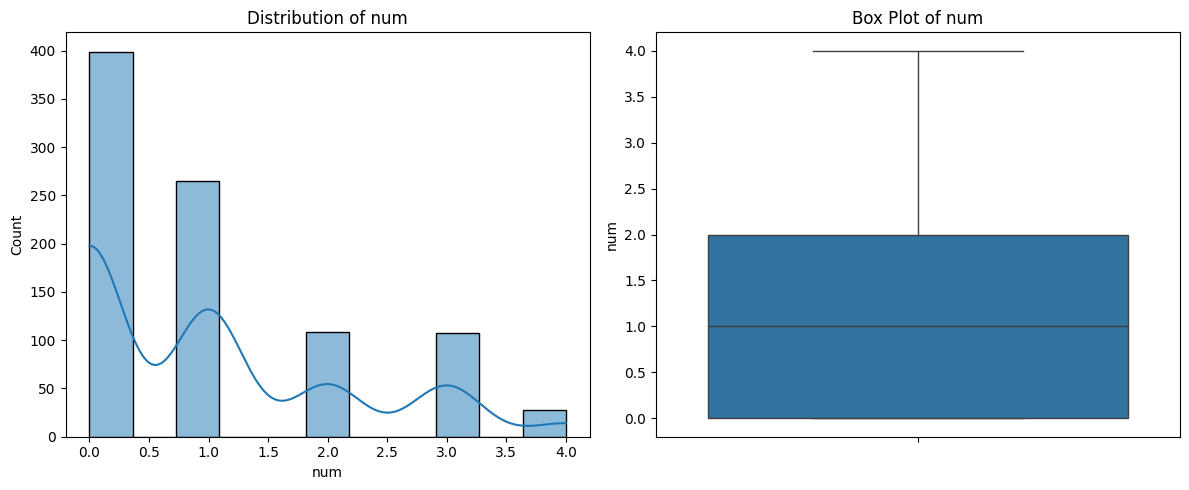

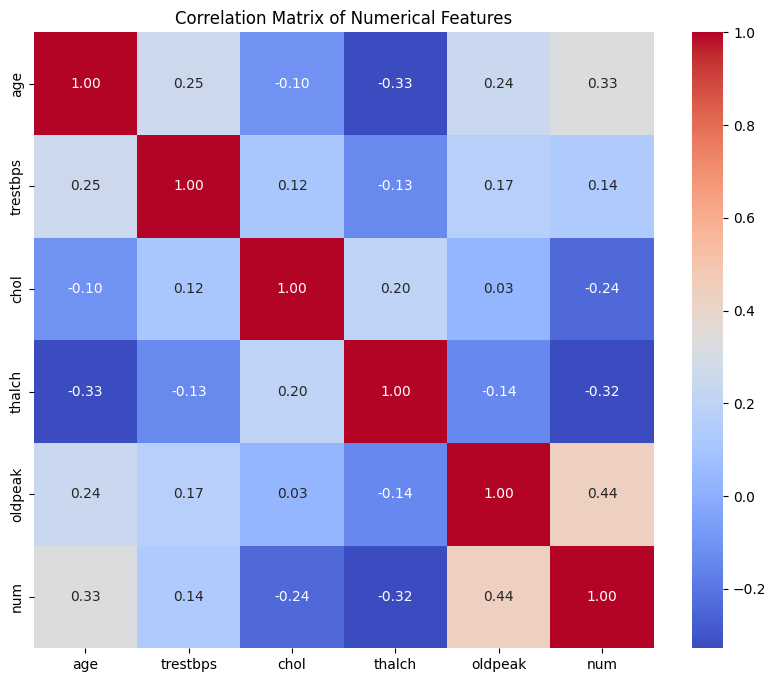


--- Feature Engineering ---

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Unique values in 'exang' after conversion:
[False True nan]

DataFrame after one-hot encoding (first 5 rows):
   age  trestbps  chol  thalch  exang  oldpeak  num  sex_Male  \
0   63       145   233     150  False      2.3    0      True   
1   41       135   203     132  False      0.0    0      True   
2   57       140   192     148  False      0.4    0      True   
3   52       118   186     190  False      0.0    0      True   
4   57       110   201     126   True      1.5    0      True   

   cp_atypical angina  cp_non-anginal  cp_typical angina  fbs_True  \
0               False           False               True      True   
1                True           False              False     False   
2               False         

/tmp/ipython-input-3904566447.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Data Preparation: Load the dataset
df = pd.read_csv('heart_disease.csv')

print("--- Data Loading and Initial Inspection ---")
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display general information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# 2. Exploratory Data Analysis (EDA):
print("\n--- Exploratory Data Analysis (EDA) ---")
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Visualize distributions of numerical features using histograms and box plots
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Feature Engineering:
print("\n--- Feature Engineering ---")
# Handle missing values in 'oldpeak' by imputing with the mean
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Convert 'exang' to boolean
df['exang'] = df['exang'].map({'TRUE': True, 'FALSE': False})
print("\nUnique values in 'exang' after conversion:")
print(df['exang'].unique())

# Identify categorical columns for one-hot encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame after one-hot encoding (first 5 rows):")
print(df.head())
print(f"New shape after one-hot encoding: {df.shape}")

numerical_cols_for_scaling = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

print("\nDataFrame after scaling numerical features (first 5 rows):")
print(df.head())

**Decision Tree Classification Hyperparameter**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Data Preprocessing and Cleaning
# Replace 0 values in 'chol' and 'trestbps' with NaN, as they are biologically impossible
df['chol'] = df['chol'].replace(0, np.nan)
df['trestbps'] = df['trestbps'].replace(0, np.nan)

# Impute missing values in 'oldpeak', 'chol', and 'trestbps' with the column mean
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

# Convert 'exang' to boolean. NaN values will remain NaN after mapping.
df['exang'] = df['exang'].map({'TRUE': True, 'FALSE': False})
# Fill NaN with the mode, then explicitly convert to bool.
df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(bool)

# Identify categorical columns for one-hot encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']

# Iterate through all columns to find and replace any '?' with NaN
for col in df.columns:
    if df[col].dtype == 'object': # Check if column is of object type (string/mixed)
        if '?' in df[col].unique():
            df[col] = df[col].replace('?', np.nan)
            # Impute newly introduced NaNs in object columns with the mode
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mode()[0])

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling numerical features
numerical_cols_for_scaling = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

# Final check to ensure no missing or infinite values remain
print("Missing values in DataFrame after all preprocessing steps:")
print(df.isnull().sum().sum())

print("Infinite values in DataFrame after all preprocessing steps:")
print(df.isin([np.inf, -np.inf]).sum().sum())

# Separate features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Logistic Regression Classification ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Implement and train the Logistic Regression model
lr_base_classifier = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
lr_classifier = OneVsRestClassifier(lr_base_classifier)

lr_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lr_classifier.predict(X_test)
y_pred_proba = lr_classifier.predict_proba(X_test)

print("\nEvaluation Metrics for Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")

try:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    print(f"ROC-AUC (OvR, macro): {roc_auc:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC-AUC: {e}.")

Missing values in DataFrame after all preprocessing steps:
0
Infinite values in DataFrame after all preprocessing steps:
0

--- Logistic Regression Classification ---
Training set shape: (726, 17)
Testing set shape: (182, 17)

Evaluation Metrics for Logistic Regression Classifier:
Accuracy: 0.5934
Precision (macro): 0.2589
Recall (macro): 0.3040
F1-Score (macro): 0.2768
ROC-AUC (OvR, macro): 0.7612


/tmp/ipython-input-1441284680.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(bool)


## **Decision Tree**

/tmp/ipython-input-3066961626.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(bool)


--- Decision Tree Classification with Hyperparameter Tuning ---
Training set shape: (726, 17)
Testing set shape: (182, 17)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

Evaluation Metrics for Optimized Decision Tree Classifier
Accuracy: 0.5604
Precision (macro): 0.2495
Recall (macro): 0.2810
F1-Score (macro): 0.2534

Feature Importances (Top 10)  Tree:
              feature  importance
4               exang    0.471569
7  cp_atypical angina    0.197650
8      cp_non-anginal    0.128541
0                 age    0.114967
3              thalch    0.066240
1            trestbps    0.021033
2                chol    0.000000
6            sex_Male    0.000000
5             oldpeak    0.000000
9   cp_typical angina    0.000000


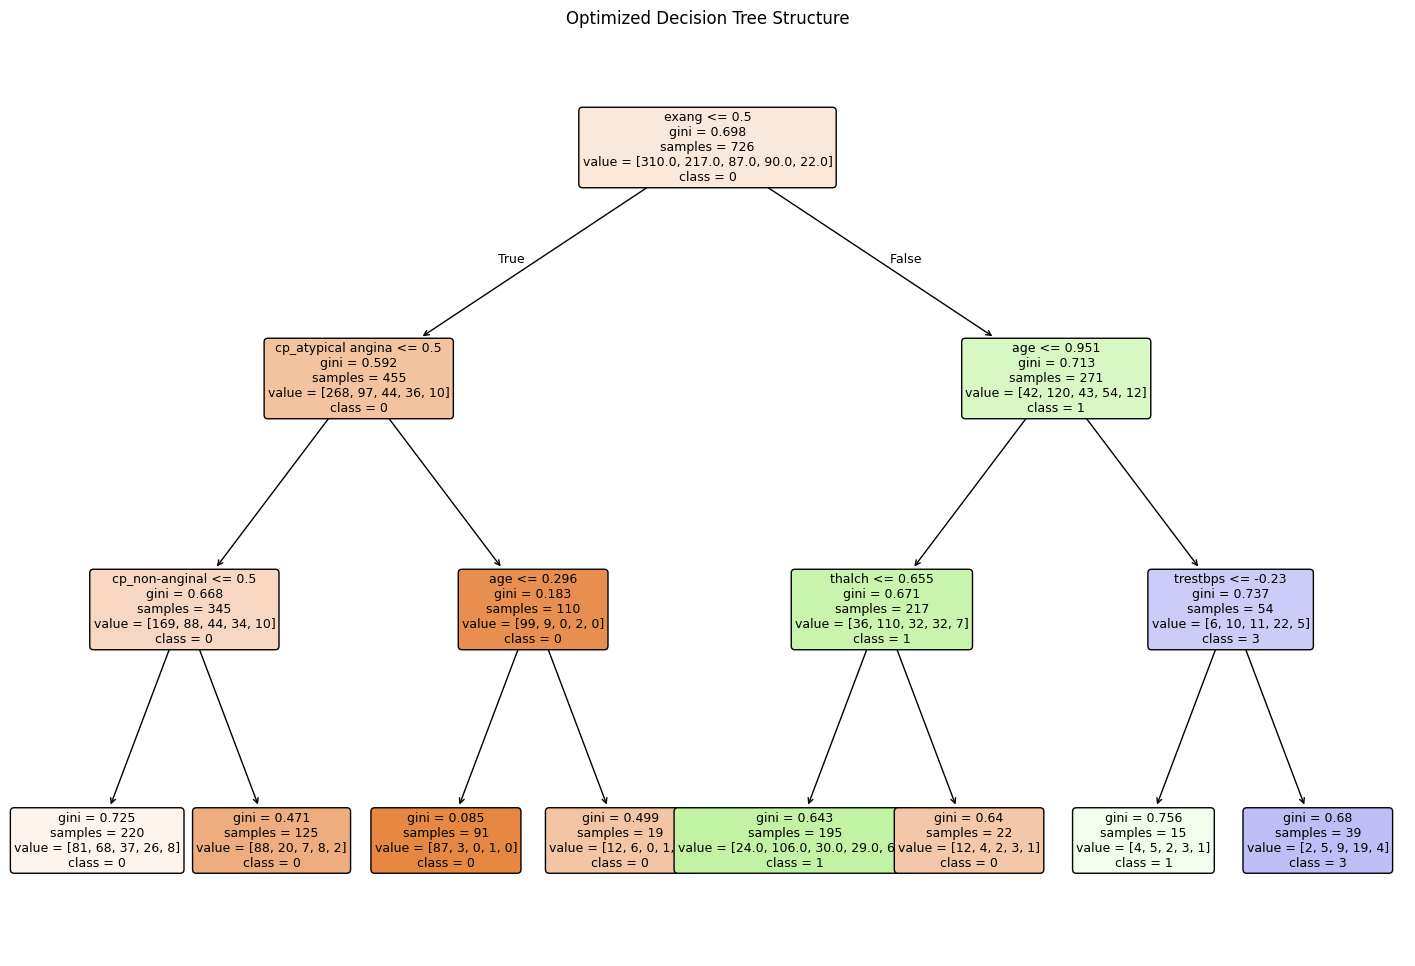

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Replace 0 values in 'chol' and 'trestbps' with NaN, as they are biologically impossible
df['chol'] = df['chol'].replace(0, np.nan)
df['trestbps'] = df['trestbps'].replace(0, np.nan)

# Impute missing values in 'oldpeak', 'chol', and 'trestbps' with the column mean
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

# Convert 'exang' to boolean and handle potential NaN values
df['exang'] = df['exang'].map({'TRUE': True, 'FALSE': False})
df['exang'] = df['exang'].fillna(df['exang'].mode()[0]).astype(bool)

# Iterate through all columns to find and replace any '?' with NaN
for col in df.columns:
    if df[col].dtype == 'object':
        if '?' in df[col].unique():
            df[col] = df[col].replace('?', np.nan)
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mode()[0])

# Apply one-hot encoding to categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling numerical features
numerical_cols_for_scaling = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

# Separate features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Decision Tree Classification with Hyperparameter Tuning ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- Hyperparameter Tuning for Decision Tree---
param_grid = {
    'max_depth': [3, 4, 5], # Reduced range for maximum depth
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_dt_classifier = grid_search.best_estimator_
print(f"\nBest Decision Tree Parameters: {grid_search.best_params_}")

# --- Model Evaluation and Analysis ---
y_pred = best_dt_classifier.predict(X_test)
y_pred_proba = best_dt_classifier.predict_proba(X_test)

print("\nEvaluation Metrics for Optimized Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")


# --- Visualize the Decision Tree Structure---
plt.figure(figsize=(18, 12))
plot_tree(best_dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=[str(cls) for cls in np.sort(y.unique())],
          filled=True,
          rounded=True,
          fontsize=9)
plt.title('Optimized Decision Tree Structure')

# --- Identify Important Features ---
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt_classifier.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances (Top 10)  Tree:")
print(feature_importances.head(10))


***Interview Question and Answers***

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision Tree hyperparameters control the tree's complexity and help prevent overfitting or underfitting.

max_depth: Limits how many levels or decisions the tree can make. A small depth makes a simpler, more interpretable tree; a large depth makes a complex tree prone to overfitting.

min_samples_split: Sets the minimum number of samples a node must have to be split further. Higher values prevent overfitting by requiring more data for a decision.

criterion: Determines how the tree measures the "quality" of a split (e.g., 'gini' impurity or 'entropy' for information gain), aiming to create pure child nodes.

**2. What is the difference between the Label encoding and One-hot encoding?**

Label Encoding assigns a unique integer to each category (e.g., Red=0, Green=1, Blue=2). This is simple but introduces an artificial order or ranking between categories where none exists (e.g., implying Green is "greater" than Red). This can mislead models that interpret numerical magnitude.

One-Hot Encoding creates a new binary (0 or 1) column for each category. For "Red," the "Color_Red" column would be 1, and others 0. This method avoids implying any order, treating each category as distinct. It's generally preferred for nominal (unordered) categorical data, though it can increase the number of features.